<style>
.center {
  margin-left: auto;
  margin-right: auto;
}
.img_center{
  display: block;
  max-width: 100%;
  height: auto;
  margin: auto;
  float: none!important;
}
</style>

<table style="width: 100%; margin-left: auto; margin-right: auto;" border="0">
    <tr>
        <td rowspan="3"> <img src="brasao_ufrn.png" width="150"/> </td>
        <td style="text-align: center">  Escola de Ciências e Tecnologia </td>
        <td rowspan="3" style="text-align: center"> UFRN<br> CT<br> PPGEMECA </td>
    </tr>
    <tr>
        <td style="text-align: center"> PPGEMECA - Percepção Robótica </td>
    </tr>
    <tr>
        <td>
            <p style="text-align: left;">Prof. Bruno Silva<br>
                                         Prof. Marcelo Nogueira</p>
        </td>
    </tr>
</table>

## Visão Computacional

- Visão Computacional:
    - Estudo de técnicas computacionais para extrair informações a partir de imagens
    - Dados de entrada: imagens de aparência/intensidade (RGB) ou de profundidade (sonar, lidar, etc.)
- Forte avanço na última década
    - Impulsionada pelo uso de smartphones, pesquisas e difusão de bibliotecas (ex.: OpenCV)

<table border="0">
<tr>
<td><img src="21_imagens_e_filtragem/rgb.png" style="margin:auto; width: 400px;"/></td>
<td><img src="21_imagens_e_filtragem/depth.png" style="margin:auto; width: 400px;"/></td>
</tr>
<tr>
<td>Imagem RGB</td>
<td>Imagem de profundidade</td>
</tr>
</table>

## Visão Computacional x Percepção Robótica

- Algoritmos de Visão Computacional podem (e são) adaptados para Robótica:
    - Identificação de objetos
    - Carros autônomos (reconhecimento de faixas, Odometria Visual)
    - Percepção 3D: obter informações geométricas a partir de imagens
- Uma forte área de aplicação: SLAM (Mapeamento e Localização Simultâneos)

## Parte II do Curso

Implementar algoritmos de Robótica Probabilística que envolvem
Visão Computacional:

- **Formação de imagens e filtragem no domínio espacial --> aula de hoje**
- Extração de características
- Rastreamento de características
- Obtenção de dados 3D a partir de pares de imagens (visão estéreo)
- Odometria Visual e SLAM Visual

## Formação de Imagem

Imagens digitais são formadas através da captura da luz de uma cena
por uma câmera

<table border="0">
<tr><td><img src="21_imagens_e_filtragem/image_formation.png" style="margin:auto; width: 600px;"/></td></tr>
<tr><td>Imagem de [1]</td></tr>
</table>

## Formação de Imagem

<table border="0">
<tr><td><img src="21_imagens_e_filtragem/image_sensor.png" style="margin:auto; width: 500px;"/></td></tr>
<tr><td>Imagem de [1]</td></tr>
</table>


## Formação de Imagem

A ser capturada pelo sensor, a luz da cena é digitalizada, em um processo
que, simplificadamente, envolve:

1. Transformação de energia luminosa em voltagens em cada uma das células fotossensíveis dos sensores
2. Determinação (através de filtros nas lentes) das componentes R (*red*), B (*blue*) e G (*green*) que formam as imagens
3. Quantização das voltagens em valores no intervalo $[0,255]$ (digitalização em 8 bits)

Ao final, uma matriz $M \times N \times 3$ codificando uma imagem é produzida


## OpenCV

- [OpenCV](www.opencv.org): considerada padrão para se trabalhar com Visão Computacional
- Open source: qualquer um pode contribuir com o desenvolvimento da biblioteca
- Fornece vários algoritmos, de básicos a avançados, em tópicos como:
    - Processamento de imagens
    - Reconhecimento de objetos
    - Matrizes e álgebra linear
    - Redes neurais e *deep learning*
    - Etc.

## OpenCV: Instalação

Para instalá-la, abra um terminal Anaconda Powershell e insira o comando a seguir:

```shell
conda install opencv
```

## OpenCV: Teste de Instalação

Execute a célula a seguir para testar a instalação da OpenCV.

Se tudo estiver ok, será impressa uma mensagem contendo a largura
e altura da imagem de teste `img_name`.

In [6]:
import cv2

def main():

    img_name = 'samples/ect_anf_c.png'
    img = cv2.imread(img_name)
    if img is None:
        print(f'Arquivo de imagem não encontrado')
    else:
        print(f'Arquivo {img_name} carregado')
        print(f'Imagem possui dimensões (l x a) {img.shape[1]} x {img.shape[0]}')

if __name__ == '__main__':
    main()

Arquivo samples/ect_anf_c.png carregado
Imagem possui dimensões (l x a) 408 x 306


## OpenCV: Exibindo Imagens I

A primeira forma de exibir imagens com a OpenCV
é utilizando a função `imshow`.

Dependendo do uso, sistema operacional e instalação,
esta função pode apresentar problemas.

In [ ]:
import cv2

def main():

    img_name = 'samples/lake.png'
    img = cv2.imread(img_name)

    cv2.imshow("Image", img)
    cv2.waitKey(0) # dá problema em algumas situações

if __name__ == '__main__':
    main()


## OpenCV: Exibindo Imagens II

A segunda forma de exibir imagens com a OpenCV é utilizando
a função `imshow` da biblioteca `Matplotlib`.

Esta função é a recomendada ao se trabalhar com Jupyter Notebooks.

Para exibição correta da imagem, é necessário:
- A conversão da ordem `BGR` (usada pela OpenCV)
  para `RGB` (usada pela Matplotlib)
- A configuração do colormap no `imshow` da Matplotlib

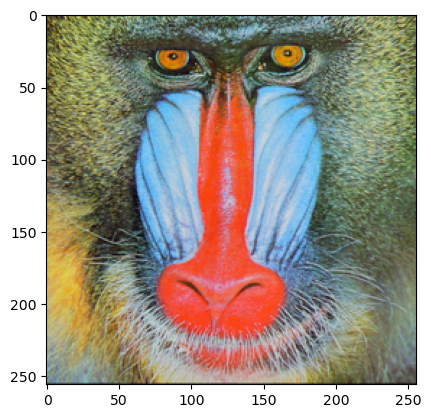

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':

    img_name = 'samples/mandrill.png'
    img = cv2.imread(img_name)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

## OpenCV: Investigando os Dados de uma Imagem I

Uma imagem em escala de cinza possui 1 canal, contendo valores que vão do 0 (preto)
ao 255 (branco). Observe a seguir.

Matriz da imagem: 256 (largura) x 256 (altura)
Pixel mín.: 8, pixel max.: 219, média: 129.65554809570312, mediana: 130.0


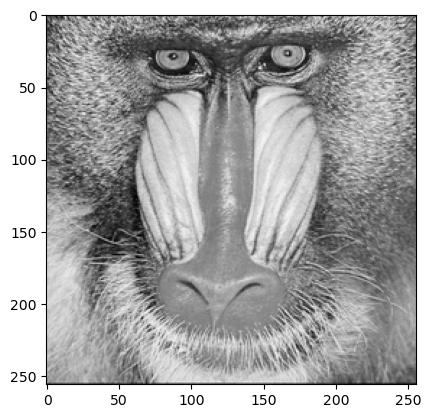

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':

    img_name = 'samples/mandrill.png'
    img = cv2.imread(img_name)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(f'Matriz da imagem: {gray.shape[1]} (largura) x {gray.shape[0]} (altura)')
    print(f'Pixel mín.: {np.min(gray)}, pixel max.: {np.max(gray)}, média: {np.mean(gray)}, mediana: {np.median(gray)}')

    plt.imshow(gray, cmap='gray') # um colormap deve ser informado para visualizar imagens em tons de cinza
    plt.show()

## OpenCV: Investigando os Dados de uma Imagem II

Observe abaixo que uma imagem colorida é composta de 3 canais
(matriz com 3 dimensões), sendo um para R, outro para G e outro
para B.

Matriz da imagem: 256 (largura) x 256 (altura) x 3 (canais)


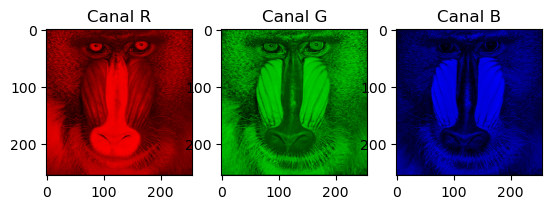

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_name = 'samples/mandrill.png'
img = cv2.imread(img_name)

print(f'Matriz da imagem: {img.shape[1]} (largura) x {img.shape[0]} (altura) x {img.shape[2]} (canais)')

img_b = img[:,:,0] # a ordem da OpenCV é B, G, R
img_g = img[:,:,1]
img_r = img[:,:,2]

blacks = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8) # imagem auxiliar para visualização
plt.subplot(131)
plt.gca().set_title('Canal R')
plt.imshow(cv2.merge((img_r, blacks, blacks)))
plt.subplot(132)
plt.gca().set_title('Canal G')
plt.imshow(cv2.merge((blacks, img_g, blacks)))
plt.subplot(133)
plt.gca().set_title('Canal B')
plt.imshow(cv2.merge((blacks, blacks, img_b)))
plt.show()

## OpenCV: Operações Básicas I

Operações básicas são aplicadas em imagens manipulando-se os valores dos seus
pixels.

Por exemplo, uma imagem pode ser convertida para um único canal (intensidade)
calculando-se a média entre os valores R, G e B das posições correspondentes.

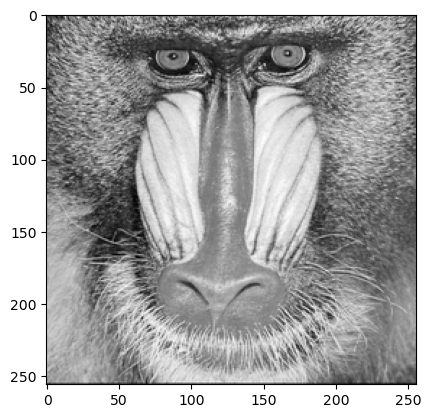

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':

    img_name = 'samples/mandrill.png'
    img = cv2.imread(img_name)

    # Imagem resultante: pode receber valores entre 0 e 255 (unsigned int 8 bits)
    # 1 canal, contém inicialmente 0s em todos os pixels
    gray = np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8)
    
    # Observe o que acontece caso a divisão e posterior multiplicação por 255
    # não seja realizada
    for i in range(img.shape[1]):
        for j in range(img.shape[0]):
            gray[i,j] = (img[i,j,0]/255 + img[i,j,1]/255 + img[i,j,2]/255)/3 * 255

    plt.imshow(gray, cmap='gray')
    plt.show()

## OpenCV: Operações Básicas II

Esta mesma funcionalidade está disponível na OpenCV atráves da função `cvtColor`, como mostrado abaixo.

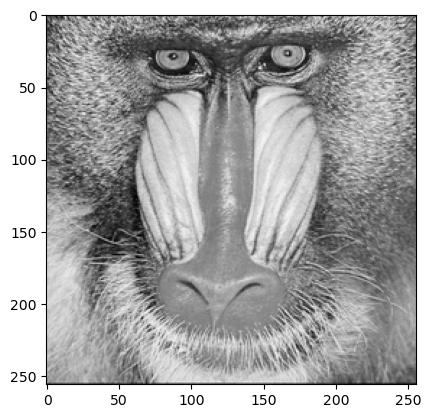

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':

    img_name = 'samples/mandrill.png'
    img = cv2.imread(img_name)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.imshow(gray, cmap='gray')
    plt.show()

## OpenCV: Operações Básicas III

No exemplo a seguir, o código aplica uma operação de *thresholding* (limiarização) em uma imagem em escala de cinzas: caso o valor do pixel seja maior que um limiar, o pixel recebe valor 255.
Caso contrário, recebe 0. Desta forma, a imagem resultante se torna binária.

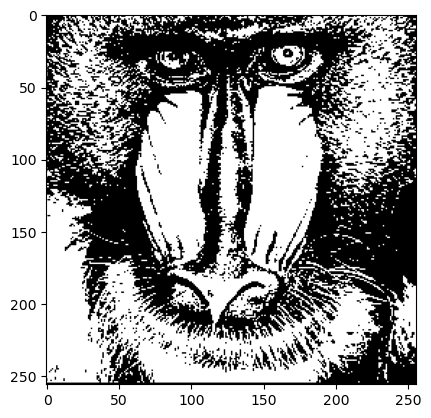

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':

    img_name = 'samples/mandrill.png'
    img = cv2.imread(img_name)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    bin_img = np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8)
    
    thr = 127 # valor do limiar
    
    for i in range(img.shape[1]):
        for j in range(img.shape[0]):
            if gray[i,j] > thr:
                bin_img[i,j] = 255
            else:
                bin_img[i,j] = 0

    plt.imshow(bin_img, cmap='gray')
    plt.show()

## OpenCV: Operações Básicas IV

Um outro exemplo de operação com imagens é a subtração entre imagens, que resulta em uma nova imagem.

Observe o código a seguir.

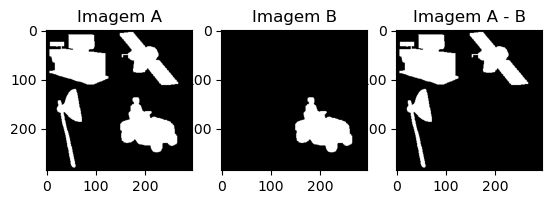

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_a = cv2.imread('samples/img_a.png')
img_b = cv2.imread('samples/img_b.png')
img_sub = img_a - img_b

plt.subplot(131)
plt.gca().set_title('Imagem A')
plt.imshow(img_a)
plt.subplot(132)
plt.gca().set_title('Imagem B')
plt.imshow(img_b)
plt.subplot(133)
plt.gca().set_title('Imagem A - B')
plt.imshow(img_sub)
plt.show()

## Visão Computacional e Ruídos

Em algoritmos de Visão Computacional, 
o ruído pode assumir diversas formas:

- Erros a partir de premissas incorretas (ex. assumir modelo de ruído ou de movimento incorreto)
- Limitação de hardware
- Erros de arredondamento nos cálculos
- Associações incorretas entre imagens (ex. rastrear um ponto incorretamente ou falsa região detectada como característica)
- **Erros no hardware do sensor**

É importante levar estes pontos em consideração no desenvolvimento
dos algoritmos.

## Imagens Digitais e Ruído

Por sua vez, o processo de aquisição de imagens está sujeito a ruídos
de diferentes origens:

- Conversão da energia luminosa intensidade digital
- Interferência de uma célula do sensor nas células vizinhas
- Processo de quantização
- Condições de iluminação ambiente na cena capturada
- etc.

Você pode verificar este fato capturando diversas imagens de uma mesma cena (estática).

## Ruído em Imagens Digitais

É importante, portanto:

- Assumir sempre a presença do ruído nos algoritmos a serem estudados
- Estudar técnicas de filtragem de ruído em imagens digitais

## Técnicas de Filtragem
 
- Necessárias, mas não suficientes
- São geralmente aplicadas como pré-processamento
- Podem formar a base para algoritmos mais complexos
- Literatura relacionada:
    - Técnicas de Processamento Digital de Sinais
    - Técnicas de Processamento Digital de Imagens
    
Existem várias técnicas, de acordo com o modelo de ruído a ser filtrado.

## Formalização do Ruído I

Os estudos aqui realizados se concentrarão em técnicas de remoção
do **ruído Gaussiano aditivo**:

$$
\hat{I}(x,y) = I(x,y) + n(x,y),
$$

onde $I(x,y)$ é o sinal original (sem ruído), $\hat{I}(x,y)$ é a imagem com ruído
e $n(x,y)$ é o ruído.

## Formalização do Ruído II

$n(x,y)$ é um ruído Gaussiano, isto é $n(x,y)\sim N(\mu, \sigma)$,
onde

- $\mu$ é a média
- $\sigma$ é o desvio padrão

## Código - Geração de Ruído

O código a seguir mostra como gerar `n` amostras
de ruído gaussiano com média `mu` e desvio padrão `sigma`.

Além disso, também é exibido um histograma
com 10 *bins* para
as `n` amostras do ruído gerado.

(100,)


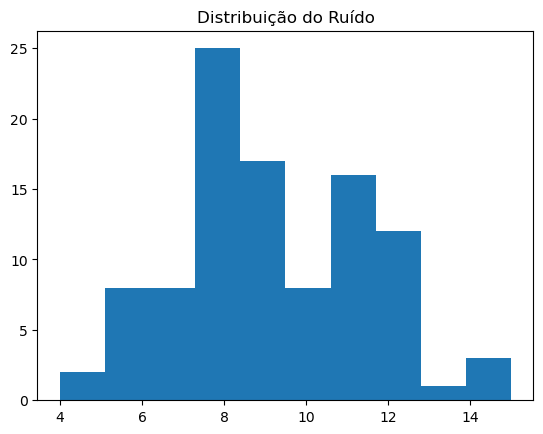

In [1]:
from matplotlib import pyplot as plt 
import numpy as np  

mu = 10 # média do ruído
sigma = 2 # desv. padrão do ruído
n = 100
samples = np.random.normal(mu, sigma, n).astype(np.uint8)
 
plt.hist(samples, bins=10)
 
plt.title("Distribuição do Ruído")
plt.show()

## Código: Geração de Imagem com Ruído I

O código a seguir gera uma imagem com ruído $n$ e a soma
com uma imagem real $I$, produzindo uma imagem ruidosa $\hat{I}$.

6
198


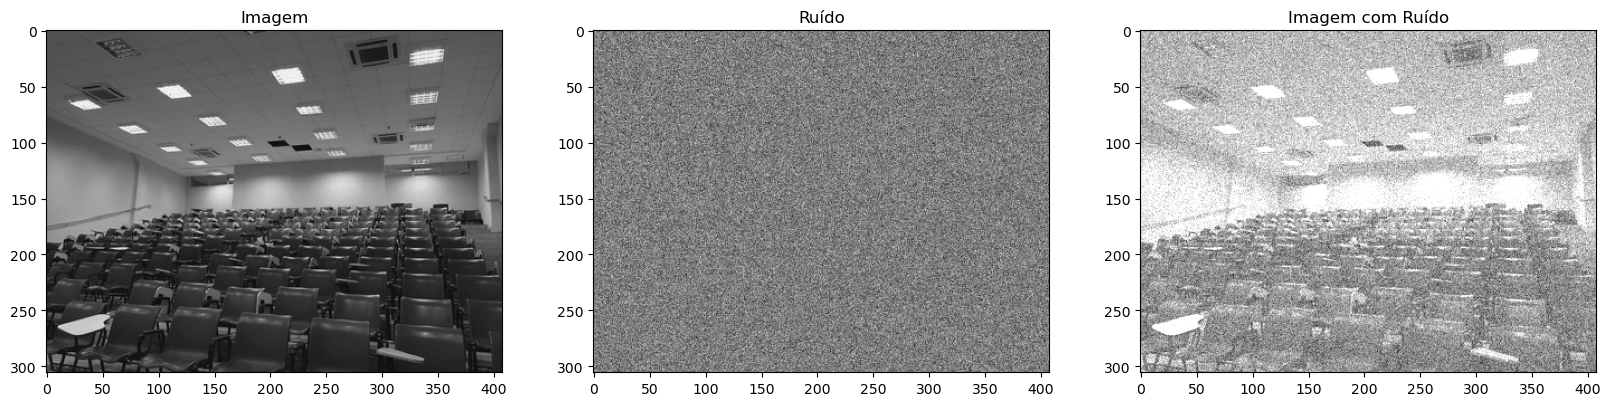

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv2.imread('samples/ect_anf_c.png')
img = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

mu = 100 # média do ruído
sigma = 20 # desv. padrão do ruído
noise = np.zeros(img.shape, dtype=np.uint8) # imagem contendo apenas o ruído
cv2.randn(noise, mu, sigma) # preenche imagem com ruído ~N(mu, sigma)
noise = (noise).astype(np.uint8)
#print(np.amin(noise)) # mostra o mín. valor de pixel na imagem do ruído
#print(np.amax(noise)) # mostra o máx. valor de pixel na imagem do ruído
img_noise = cv2.add(img, noise) # esta função tem o cuidado de limitar o resultado entre 0 e 255

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.gca().set_title('Imagem')
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.gca().set_title('Ruído')
plt.imshow(noise, cmap='gray')
plt.subplot(133)
plt.gca().set_title('Imagem com Ruído')
plt.imshow(img_noise, cmap='gray')
plt.show()

## Código: Geração de Imagem com Ruído II

A mesma funcionalidade pode ser implementada utilizando apenas funções do Numpy,
como mostrado a seguir.

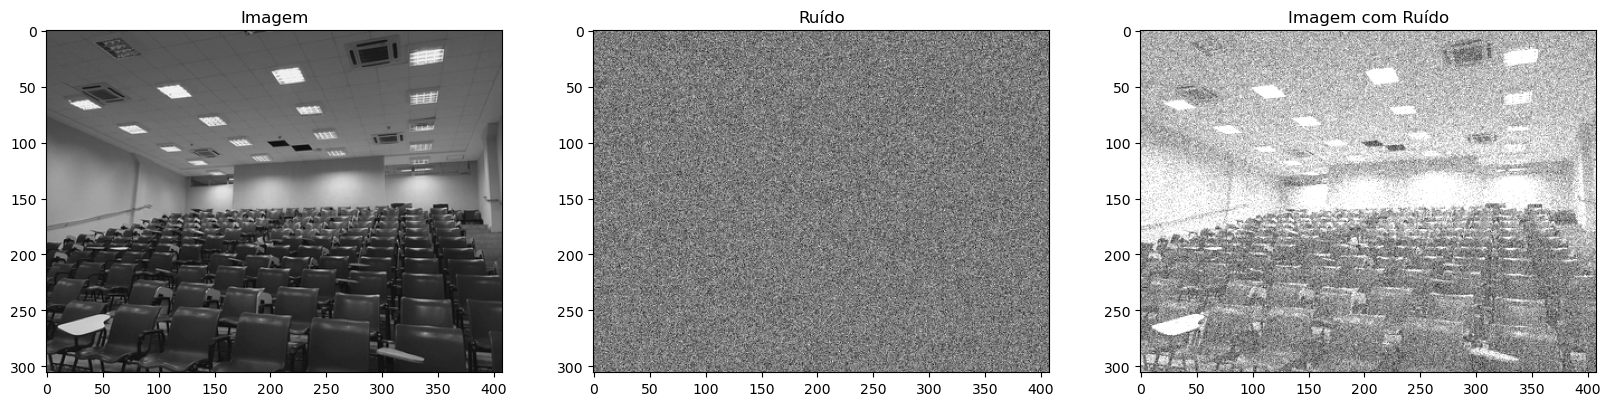

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv2.imread('samples/ect_anf_c.png')
img = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

mu = 100 # média do ruído
sigma = 20 # desv. padrão do ruído
noise = np.random.normal(mu, sigma, img.shape) # gera matriz com ruído ~N(mu, sigma)
img_noise = img + noise
img_noise = np.clip(img_noise, 0, 255).astype(np.uint8) # limita o resultado entre 0 e 255

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.gca().set_title('Imagem')
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.gca().set_title('Ruído')
plt.imshow(noise, cmap='gray')
plt.subplot(133)
plt.gca().set_title('Imagem com Ruído')
plt.imshow(img_noise, cmap='gray')
plt.show()

## Filtragem em Imagens Digitais I

Para o ruído Gaussiano aditivo, a técnica de filtragem mais
adequada é a **filtragem por Convolução**

## Filtragem em Imagens Digitais II

Convolução:

- Operação entre sinais
- Possui atrativos como ser uma operação linear
- Em imagens (sinais 2D), a operação de convolução é de fácil implementação

## Filtragem por Convolução em Imagens Digitais

A convolução de uma imagem 2D $I_e$ por um filtro $K$ (também conhecido como máscara ou *kernel*)
resulta em uma outra imagem 2D $I_s$.

Esta operação é dada pela fórmula a seguir.

$$
I_s(x,y) = \sum_{i=-a}^{a}\sum_{j=-b}^{b}I_e(x-i, y-j)K(i,j)
$$

(os valores $a$ e $b$ denotam os limites de acordo com o tamanho do filtro $K$).

## Filtragem por Convolução

O filtro $K$:

- Geralmente possui tamanho ímpar ($3 \times 3$, $5 \times 5$, $7 \times 7$, etc.)
- Pode realizar diferentes funções em uma imagem, de acordo com seus valores (coeficientes)
    - Borramento
    - Realce
    - Destaque de bordas
    - etc.
- Tem os seus coeficientes normalizados:
    - Se a soma dos coeficientes $> 0$, cada um deles deve ser dividido por esta soma
    - Se a soma dos coeficientes é $0$, não é preciso dividir
    

## Filtro Passa Baixas

Para remover ruído do tipo Gaussiano em imagens, utiliza-se um
**filtro passa-baixas**

- Atenua altas frequências
- Pode ser de dois tipos:
    - Filtro da média
    - Filtro Gaussiano
    
<table border="0">
<tr><td><img src="21_imagens_e_filtragem/filtros_passa_baixa.png" style="margin:auto; width: 500px;"/></td></tr>
</table>

## Filtragem por Convolução: intuição

Intuitivamente, o filtro "desliza" sobre a imagem de entrada,
produzindo a imagem filtrada.

O valor do pixel na imagem de saída é calculado pela soma dos
produtos entre os coeficientes do filtro e os pixels na
imagem de entrada.

## Convolução em Imagens I

Exemplo de convolução com o filtro da média $3 \times 3$:

<table border="0">
<tr>
<td> Instante inicial </td>
<td> Pixel (1,1) </td>
<td> Pixel (1,2) </td>
<td> Pixel (1,3) </td>
</tr>
<tr>
<td><img src="21_imagens_e_filtragem/convolucao1.png" style="margin:auto; width: 200px;"/></td>
<td><img src="21_imagens_e_filtragem/convolucao2.png" style="margin:auto; width: 200px;"/></td>
<td><img src="21_imagens_e_filtragem/convolucao3.png" style="margin:auto; width: 200px;"/></td>
<td><img src="21_imagens_e_filtragem/convolucao4.png" style="margin:auto; width: 200px;"/></td>
</tr>
<tr>
<td colspan=4> Convolução: filtro deslizante. </td>
</tr>
</table>

## Convolução em Imagens II

Exemplo de convolução com o filtro da média $3 \times 3$:

<table border="0">
<tr>
<td> Pixel (2,1) </td>
<td> Pixel (2,2) </td>
<td> Pixel (2,3) </td>
<td> Imagem final </td>
</tr>
<tr>
<td><img src="21_imagens_e_filtragem/convolucao5.png" style="margin:auto; width: 200px;"/></td>
<td><img src="21_imagens_e_filtragem/convolucao6.png" style="margin:auto; width: 200px;"/></td>
<td><img src="21_imagens_e_filtragem/convolucao7.png" style="margin:auto; width: 200px;"/></td>
<td><img src="21_imagens_e_filtragem/convolucao8.png" style="margin:auto; width: 200px;"/></td>
</tr>
<tr>
<td colspan=4> Convolução: observe o que ocorre com os pixels da borda. </td>
</tr>
</table>

## Convolução em Imagens: Bordas

Para processar as bordas da imagem, algumas abordagens podem ser tomadas:

- Considerar um valor constante (ex. 0) para os valores fora da imagem
- Desconsiderar os valores fora da imagem (envolve recalcular o fator de normalização do filtro)
- Estender os valores da linha/coluna da matriz para os valores fora da imagem
- "Embrulhar" (*wrap*) a imagem: considera os valores da borda oposta para os valores fora da imagem

## OpenCV: Filtragem da Média

O código a seguir mostra como remover ruído
gaussiano com o filtro da média na biblioteca OpenCV.

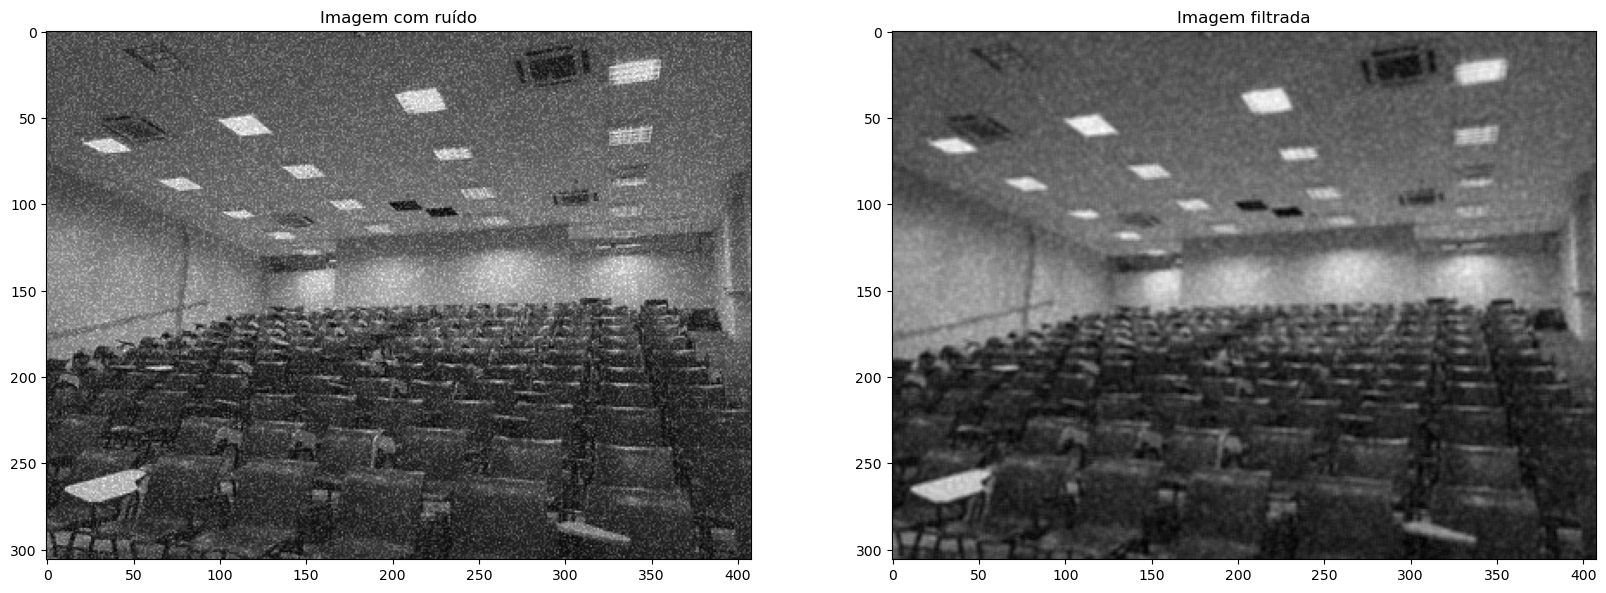

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv2.imread('samples/ect_anf_c.png')
img = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

# gera imagem com ruído
mu = 10
sigma = 20
noise = np.zeros(img.shape, dtype=np.uint8)
cv2.randn(noise, mu, sigma)
noise = (noise).astype(np.uint8)
img_noise = cv2.add(img, noise)

# remove ruído com filtro da média de tamanho 3x3
img_filtered = cv2.blur(img_noise, (3,3))

# exibe resultado
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.gca().set_title('Imagem com ruído')
plt.imshow(img_noise, cmap='gray')
plt.subplot(122)
plt.gca().set_title('Imagem filtrada')
plt.imshow(img_filtered, cmap='gray')
plt.show()

## OpenCV: Filtragem Gaussiana

O código a seguir mostra como remover ruído
gaussiano com o filtro gaussiano na biblioteca OpenCV.

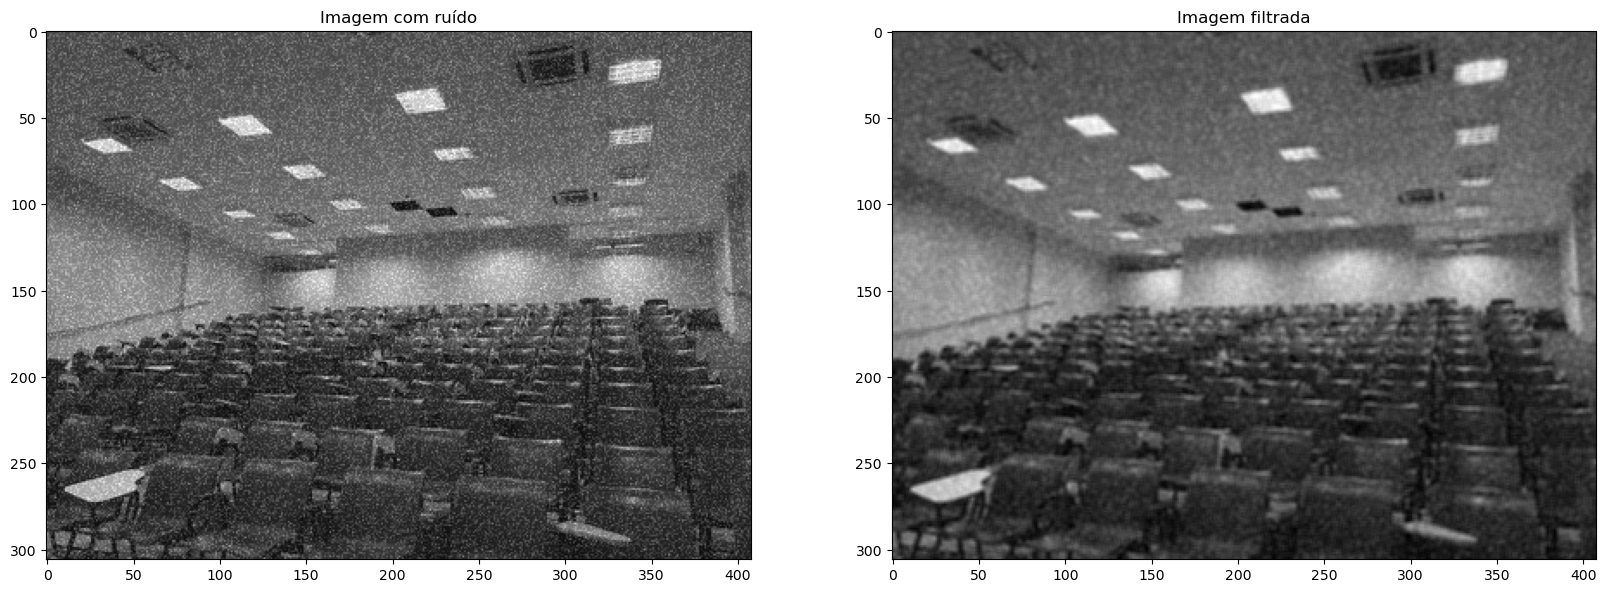

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv2.imread('samples/ect_anf_c.png')
img = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

# gera imagem com ruído
mu = 10
sigma = 20
noise = np.zeros(img.shape, dtype=np.uint8)
cv2.randn(noise, mu, sigma)
noise = (noise).astype(np.uint8)
img_noise = cv2.add(img, noise)

# remove ruído com filtro gaussiano de tamanho 3x3 e desv. padrão 0.0
img_filtered = cv2.GaussianBlur(img_noise, (3,3), 0) # d.p = 0 -> a função calcula a partir do tamanho do filtro

# exibe resultado
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.gca().set_title('Imagem com ruído')
plt.imshow(img_noise, cmap='gray')
plt.subplot(122)
plt.gca().set_title('Imagem filtrada')
plt.imshow(img_filtered, cmap='gray')
plt.show()

## Sumário

Nesta aula:

- Formação de imagens
- Operações básicas em imagens e OpenCV
- Ruído em imagens
- Convolução para filtragem passa-baixas em imagens

# Referências:

[1] Richard Szeliski. 2010. Computer Vision: Algorithms and Applications (1st. ed.). Springer-Verlag, Berlin, Heidelberg.

[2] Emanuele Trucco and Alessandro Verri. 1998. Introductory Techniques for 3-D Computer Vision. Prentice Hall PTR, USA.

[3] Adrian Kaehler and Gary Bradski. 2014. Learning OpenCV, 2nd Edition. O'Reilly Media, Inc.